

In this session, we would like to do the following practice:

**1.** Comparison the Batch Gradient Descent (BGD), Stochastic Gradient Descent (SGD) and Mini Batch Gradient Descent (MBGD);


In this session, we will visually and practically compare the three main variants of gradient descent, the core optimization algorithm in deep learning:
1.  **Batch Gradient Descent (BGD):** Uses the entire dataset for each update.
    *Stable and smooth convergence, but can be slow and memory-intensive for large datasets.*

2.  **Stochastic Gradient Descent (SGD):** Uses a single data point for each update.
    *Faster and more random; adds noise that can help escape local minima, but convergence is less stable.*
3.  **Mini-Batch Gradient Descent (MBGD):** Uses a small batch of data for each update. *Balances stability and speed; this is the most common approach in modern deep learning.*

We will implement each one from scratch to understand their behavior, stability, and convergence speed on a simple linear regression problem.


## Setup and Data generation

First, let's import the libraries and create a simple, linear dataset with some noise. We will use this same dataset for all three experiments to ensure a fair comparison.

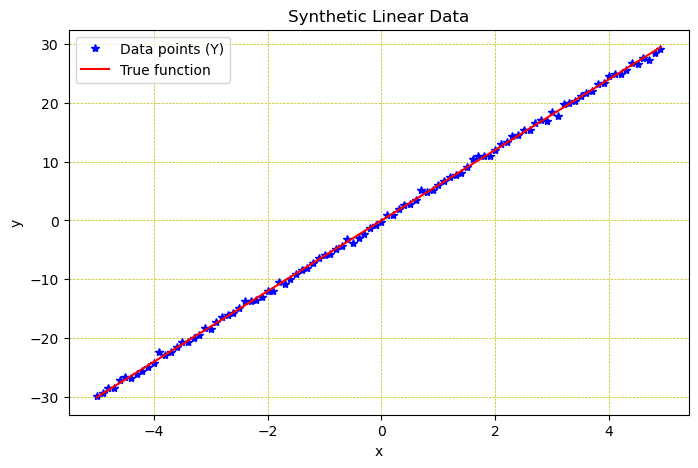

In [1]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

# --- 1. Generate Synthetic Data ---
# We create a simple linear relationship: y = 6x + noise
X = torch.arange(-5, 5, 0.1).view(-1, 1)
true_func = 6 * X
# Add Gaussian noise to create the target variable Y
Y = true_func + 0.4 * torch.randn(X.size())

# --- 2. Visualize the Data ---
plt.figure(figsize=(8, 5))
plt.plot(X, Y, 'b*', label='Data points (Y)')
plt.plot(X, true_func, 'r-', label='True function')
plt.title("Synthetic Linear Data")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, color='y', linestyle='--', linewidth=0.5)
plt.show()

We will use a simple linear model `(y = w*x + b)` and Mean Squared Error (MSE) as our loss function.

In [2]:
# --- 3. Define the Model and Loss ---
# Our model is a simple linear function
def forward(x):
    return w * x + b

# Our loss function is Mean Squared Error (MSE)
def criterion(y_pred, y_true):
    return torch.mean((y_pred - y_true) ** 2)

## 5-1 (Batch) Gradient Descend

The gradient descent algorithm is a very common method in deep learning, which used to optimize the parameters of a model by computing the gradients of an objective function w.r.t the parameters.

In order to find the optimal solution, you can try to use the exhaustive method, the divide and conquer method or the greedy algorithm. The gradient descent algorithm is a greedy algorithm. Through continuous iteration, each time the direction with the fastest loss reduction is selected to update the parameters, the local optimal solution can be quickly reached. 
If the function is a convex function, the local optimal solution is the global optimal solution; if the function is a non-convex function, it may fall into the local optimal solution, or the saddle point where the gradient is 0 in the neural network, thus stopping the iteration.

Here we have some artificially generated data and want to train a neural network to approximate a function. When the function is a linear function , we show the iterative update process using batch gradient descend.

Predict before training with BGD: 4.0 tensor(-60., grad_fn=<AddBackward0>)
iteration: 0, 	 loss: 2500.4619140625, 	 weight: 16.463598251342773, 	 bias: -16.16046905517578
iteration: 5, 	 loss: 80.13871765136719, 	 weight: 4.561776161193848, 	 bias: -5.266302108764648
iteration: 10, 	 loss: 5.444659233093262, 	 weight: 6.167713165283203, 	 bias: -1.732521891593933
iteration: 15, 	 loss: 0.6522724032402039, 	 weight: 5.966705799102783, 	 bias: -0.5691207051277161
Predict after training with BGD: 4.0 tensor(23.7194, grad_fn=<AddBackward0>)


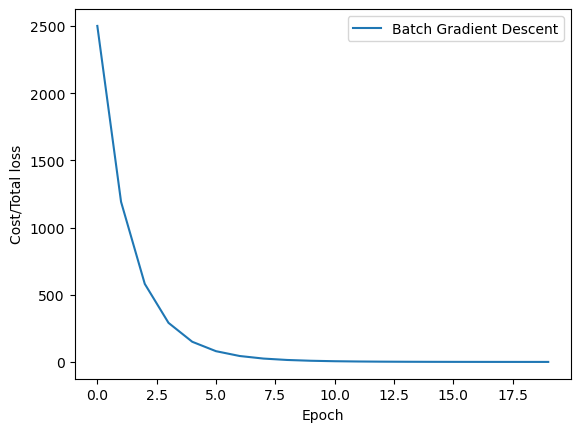

In [3]:
# --- BGD Implementation ---
#  initial parameters w and b
w = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)

#  other parameters 
step_size = 0.1
loss_BGD = []
n_iter = 20

#Initial predictions 
print('Predict before training with BGD:',4.0,forward(4.0))

for i in range (n_iter):
    
    # forward pass on the ENTIRE dataset
    Y_pred = forward(X)

    # calculating the loss between all original and all predicted data points
    loss = criterion(Y_pred, Y)
    loss_BGD.append(loss.item())

    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss.backward()

    # updating the parameters after each iteration
    w.data = w.data - step_size * w.grad.data
    b.data = b.data - step_size * b.grad.data

    # zeroing gradients after each iteration
    w.grad.zero_()
    b.grad.zero_()

    # printing some values for understanding
    if i % 5 == 0:
        print('iteration: {}, \t loss: {}, \t weight: {}, \t bias: {}'.format(i, loss.item(), w.item(), b.item()))

#Predict y after updating w
print('Predict after training with BGD:', 4.0, forward(4.0))

# plot the figure (loss_BGD)
plt.plot(loss_BGD, label="Batch Gradient Descent")
plt.xlabel('Epoch')
plt.ylabel('Cost/Total loss')
plt.legend()
plt.show()

## **2. Stochastic Gradient Descend**
Instead of using the gradient mean of all samples to update, in each iteration, a sample is randomly selected from N samples, and the weight w is derived using the loss of a single sample to obtain the gradient, and the weight w is calculated and renew. When encountering a saddle point or a local minimum, the random gradient is helpful to help jump out of this area, so that the algorithm can continue to move towards the optimal point.

Predict before training with SGD: 4.0 tensor(-60., grad_fn=<AddBackward0>)
iteration: 0, 	 loss: 110389928919040.0, 	 weight: -8239396.0, 	 bias: -1674590.25
Predict after training with SGD: 4.0 tensor(-32382702., grad_fn=<AddBackward0>)


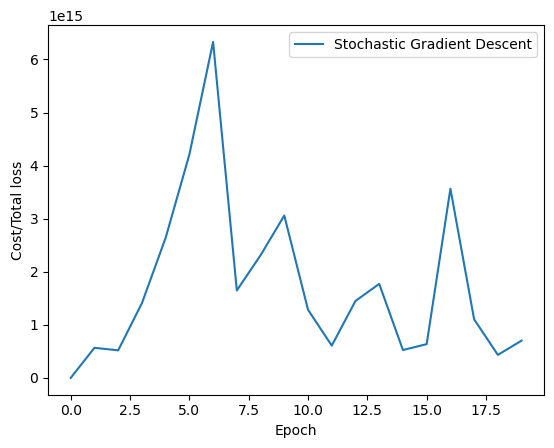

In [ ]:
# Stochastic Gradient Descend(SGD)


#  initial parameters w and b
w = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)

#  other parameters 
step_size = 0.1
loss_SGD = []
n_iter = 20

#Initial predictions 
print('Predict before training with SGD:',4.0,forward(4.0))

for i in range (n_iter): 
  # After each full pass (epoch), calculate the loss on the WHOLE dataset for fair comparison
  Y_pred = forward(X)
  # store the loss in the list
  loss_SGD.append(criterion(Y_pred, Y).tolist())
  # Iterate through each sample one by one
  for x, y in zip(X, Y):
    # making a prediction in forward pass
    y_hat = forward(x)

    # calculating the loss between original and predicted data points
    loss = criterion(y_hat, y)

    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss.backward()

    # updating the parameters after each iteration
    w.data = w.data - step_size * w.grad.data
    b.data = b.data - step_size * b.grad.data

    # zeroing gradients after each iteration
    w.grad.zero_()
    b.grad.zero_()
  
  
  # printing some values for understanding
  if i % 100 == 0:
      print('iteration: {}, \t loss: {}, \t weight: {}, \t bias: {}'.format(i, loss.item(), w.item(), b.item()))

#Predict y after updating w
print('Predict after training with SGD:', 4.0, forward(4.0))

# print(loss_SGD)
plt.plot(loss_SGD,label="Stochastic Gradient Descent")
plt.xlabel('Epoch')
plt.ylabel('Cost/Total loss')
plt.legend()

plt.show()

As you can see, the loss smoothly decreases for batch gradient descent. 
However, stochastic gradient descent has very noisy convergence, because using only one data point for one update. You’ll observe fluctuations in the graph for SGD.
In batch gradient descent, the loss is updated after all the training samples are processed while the stochastic gradient descent updates the loss after every training sample in the training data.



## **3. Mini-Batch Gradient Descent**
Instead of a single sample or the whole dataset, a small batches of the dataset is considered and update the parameters accordingly. For a dataset of 100 samples, if the batch size is 4, meaning we have 25 batches. Hence, updates occur 25 times.

MBGD is the practical compromise between BGD and SGD. It updates the parameters after processing a small batch of data. It balances the stability of BGD with the efficiency of SGD and is the standard method used in deep learning. We use PyTorch's DataLoader to handle batching for us.


For more mathmatical details, please refer [website](https://www.baeldung.com/cs/gradient-stochastic-and-mini-batch#:~:text=Mini%20Batch%20Gradient%20Descent%20is,the%20gradients%20for%20each%20batch.&text=is%20a%20hyperparameter%20that%20denotes%20the%20size%20of%20a%20single%20batch.).

Predict before training with MBGD: 4.0 tensor(-60., grad_fn=<AddBackward0>)
100
20
Prediction before training: y=-60.0000
iteration: 0, 	 loss: 122676270071808.0, 	 weight: -10.0, 	 bias: -20.0
iteration: 1, 	 loss: 0.39699235558509827, 	 weight: 6.234470844268799, 	 bias: -0.08828679472208023
iteration: 2, 	 loss: 0.28241172432899475, 	 weight: 5.852982521057129, 	 bias: -0.08763127774000168
iteration: 3, 	 loss: 0.7594962120056152, 	 weight: 5.450700283050537, 	 bias: -0.10300414264202118
iteration: 4, 	 loss: 0.7272018194198608, 	 weight: 5.629674434661865, 	 bias: -0.09167461097240448
iteration: 5, 	 loss: 0.009938979521393776, 	 weight: 6.077447891235352, 	 bias: 0.013872381299734116
iteration: 6, 	 loss: 0.269658625125885, 	 weight: 5.839507102966309, 	 bias: 0.006073635071516037
iteration: 7, 	 loss: 0.168082594871521, 	 weight: 5.991794586181641, 	 bias: 0.007319757714867592
iteration: 8, 	 loss: 0.4856472909450531, 	 weight: 5.784365653991699, 	 bias: -0.05965340882539749
iter

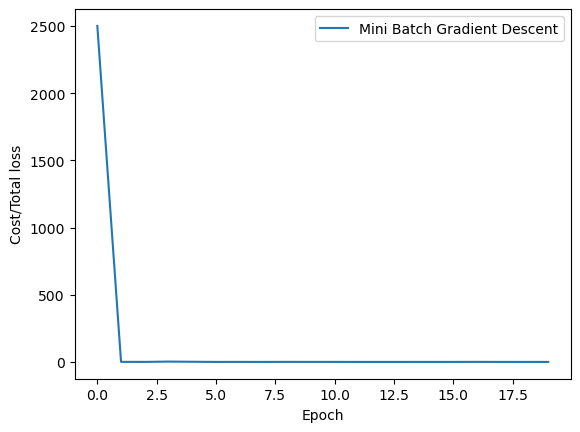

In [5]:
# --- MBGD Implementation ---


#  initial parameters w and b
w = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)

#  other parameters 
step_size = 0.1
loss_MBGD = []
n_iter = 20

#Initial predictions 
print('Predict before training with MBGD:',4.0,forward(4.0))

print(len(X))
batch_size = 5
n_batches = int(len(X) / batch_size) 
print(n_batches)


# Create a PyTorch DataLoader for easy batching
dataset = TensorDataset(X, Y)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


print(f"Prediction before training: y={forward(4.0).item():.4f}")

for epoch in range(len(dataloader)):
  # After each epoch, calculate the loss on the WHOLE dataset for comparison
  Y_pred = forward(X)
  # store the loss in the list
  loss_MBGD.append(criterion(Y_pred, Y).tolist())
  # Printing some values for understanding
  print('iteration: {}, \t loss: {}, \t weight: {}, \t bias: {}'.format(epoch, loss.item(), w.item(), b.item()))


  for batch in dataloader:
    batch_X, batch_y = batch

    # Forward pass
    Ybatch_pred = forward(batch_X)

    # Compute loss
    loss = criterion(Ybatch_pred, batch_y)

    
    # Backward pass
    loss.backward()

    # updating the parameters after each iteration
    w.data = w.data - step_size * w.grad.data
    b.data = b.data - step_size * b.grad.data
    
    # zeroing gradients after each iteration
    w.grad.zero_()
    b.grad.zero_()

  
#Predict y after updating w
print('Predict after training with MBGD:', 4.0, forward(4.0))

# plot the figure (loss_BGD)
plt.plot(loss_MBGD, label="Mini Batch Gradient Descent")
plt.xlabel('Epoch')
plt.ylabel('Cost/Total loss')
plt.legend()
plt.show()



Comparison of the three methods:

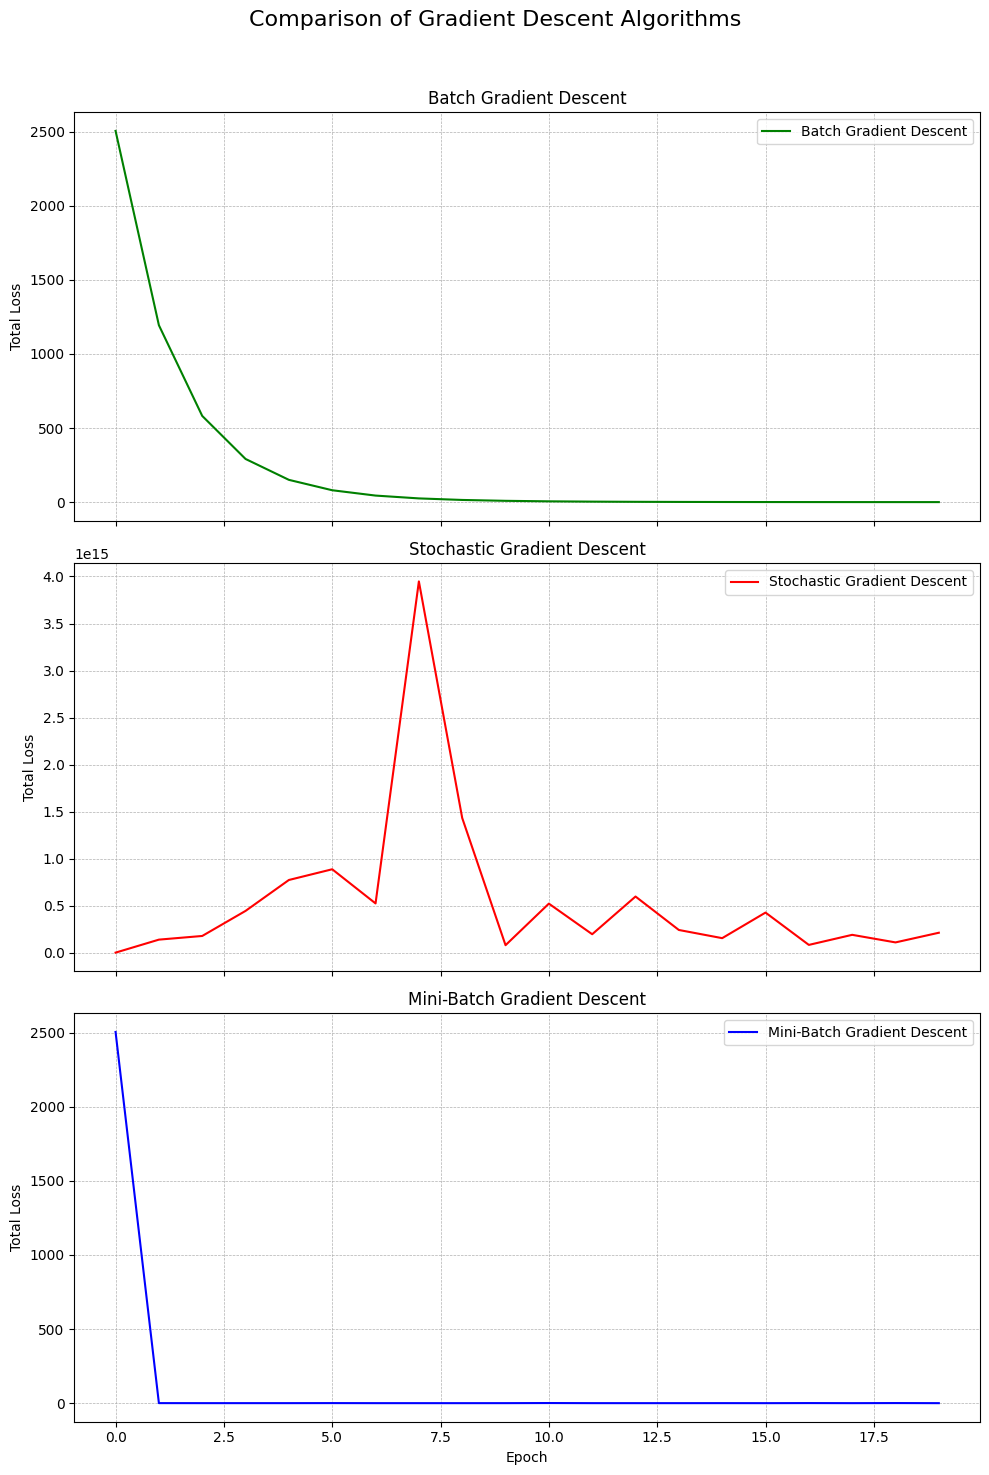

In [6]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots, arranged vertically, sharing the same x-axis
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

fig.suptitle('Comparison of Gradient Descent Algorithms', fontsize=16)

# --- Plot 1: Batch Gradient Descent ---
axes[0].plot(loss_BGD, 'g', label="Batch Gradient Descent")
axes[0].set_ylabel('Total Loss')
axes[0].set_title('Batch Gradient Descent')
axes[0].grid(True, linestyle='--', linewidth=0.5)
axes[0].legend()

# --- Plot 2: Stochastic Gradient Descent ---
axes[1].plot(loss_SGD, 'r', label="Stochastic Gradient Descent")
axes[1].set_ylabel('Total Loss')
axes[1].set_title('Stochastic Gradient Descent')
axes[1].grid(True, linestyle='--', linewidth=0.5)
axes[1].legend()

# --- Plot 3: Mini-Batch Gradient Descent ---
axes[2].plot(loss_MBGD, 'b', label="Mini-Batch Gradient Descent")
axes[2].set_ylabel('Total Loss')
axes[2].set_title('Mini-Batch Gradient Descent')
axes[2].set_xlabel('Epoch') # Only need x-label on the bottom plot
axes[2].grid(True, linestyle='--', linewidth=0.5)
axes[2].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make room for suptitle
plt.show()

**Conclusion:**
*   **Batch Gradient Descent (Green):** Shows the smoothest and most stable convergence but may be the slowest for very large datasets.
*   **Stochastic Gradient Descent (Red):** Is very noisy and fluctuates significantly. While it converges in a similar direction, the path is erratic. This noise can sometimes help it escape local minima.
*   **Mini-Batch Gradient Descent (Blue):** Offers the best of both worlds. It is much smoother than SGD but converges much faster than BGD. This is why it is the default choice for training virtually all deep learning models.